

# Project : Movielens Dataset Analysis


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

In [24]:
from sklearn.metrics import *
from sklearn.model_selection import *

In [25]:


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC



In [26]:
movie_data = pd.read_csv("D:\\Hash-Lab\\Movie-lens-case-study--main\\movies.dat",sep="::", header=None, names=['MovieID','Title','Genres'], encoding='latin-1' ,dtype={'MovieID': np.int32, 'Title': str, 'Genres': str}, engine='python')
users_data = pd.read_csv("D:\\Hash-Lab\\Movie-lens-case-study--main\\users.dat",sep="::", header=None, names=['UserID','Gender','Age','Occupation','Zip-code'], dtype={'UserID': np.int32, 'Gender': str, 'Age': np.int32, 'Occupation' : np.int32, 'Zip-code' : str}, engine='python')
ratings_data = pd.read_csv("D:\\Hash-Lab\\Movie-lens-case-study--main\\ratings.dat",sep="::", header=None, names=['UserID','MovieID','Rating','Timestamp'], dtype={'UserID': np.int32, 'MovieID': np.int32, 'Rating': int, 'Timestamp' : str}, engine='python')

In [27]:
movie_data.head()
movie_data.shape
movie_data.isnull().sum()
movie_data.describe()
movie_data.info()


users_data.head()
users_data.shape
users_data.describe()
users_data.isnull().sum()
users_data.info()

ratings_data.head()
ratings_data.shape
ratings_data.describe()
ratings_data.info()
ratings_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MovieID  3883 non-null   int32 
 1   Title    3883 non-null   object
 2   Genres   3883 non-null   object
dtypes: int32(1), object(2)
memory usage: 76.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int32 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int32 
 3   Occupation  6040 non-null   int32 
 4   Zip-code    6040 non-null   object
dtypes: int32(3), object(2)
memory usage: 165.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   UserID     1000209 no

UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64

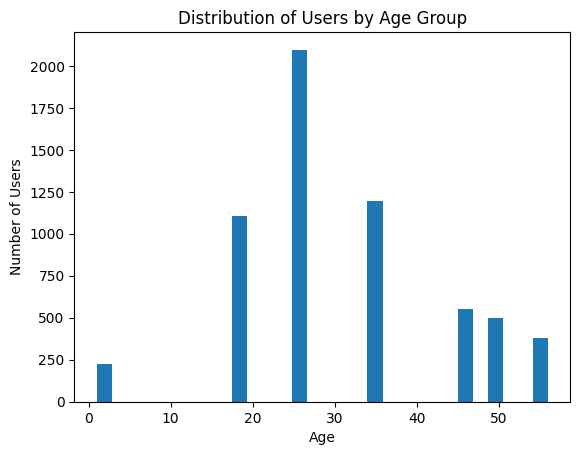

In [28]:
age_group = users_data.groupby('Age').size()
age_group

plt.hist(x=age_group.index, weights=age_group.values, bins=30)
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.title('Distribution of Users by Age Group')
plt.show()



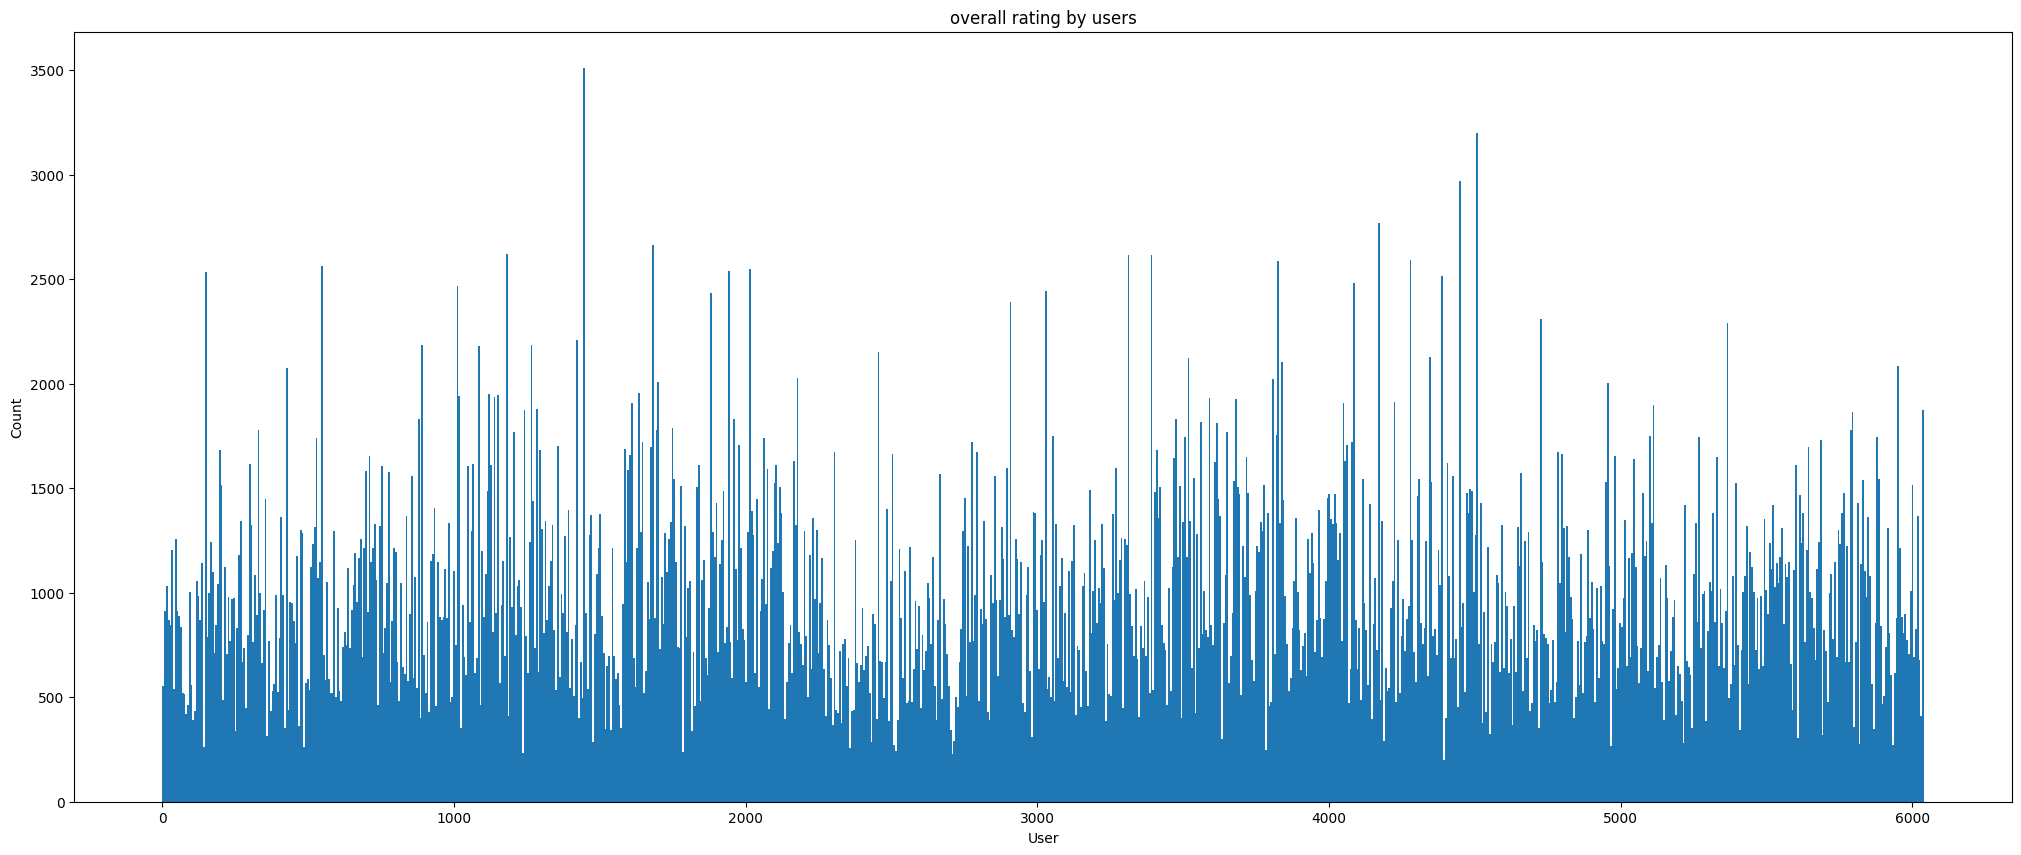

In [30]:
user_group = ratings_data.groupby(['UserID']).size()
user_group.head(10)

plt.figure(figsize=(25,10))

plt.xlabel('User')
plt.ylabel('Count')
plt.title('overall rating by users')
plt.hist(x=[ratings_data.UserID], bins=1000)
plt.show()

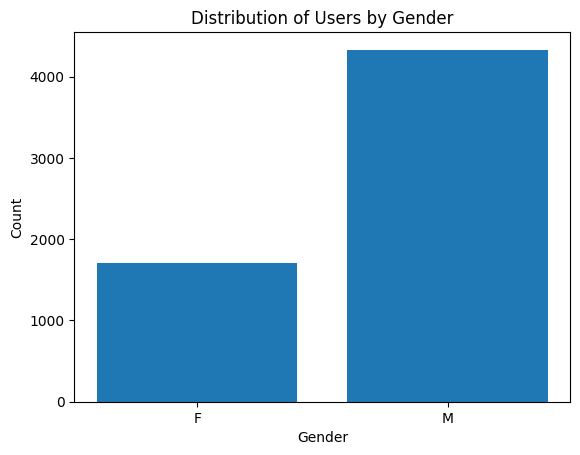

In [29]:
gender_group = users_data.groupby('Gender').size()
gender_group

# Plotting the histogram
plt.bar(gender_group.index, gender_group.values)

# Adding labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Users by Gender')

# Displaying the plot
plt.show()

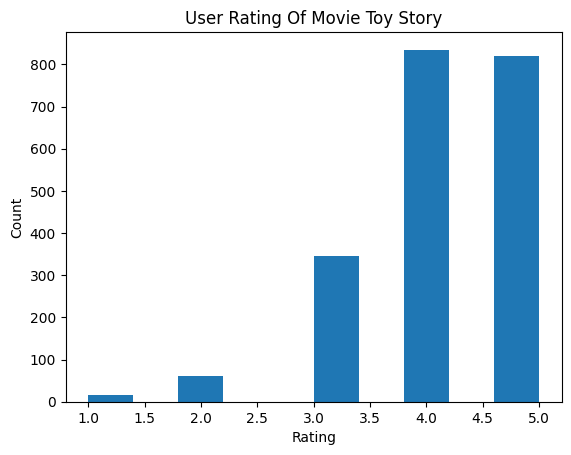

In [31]:
toystory_data = ratings_data[ratings_data.MovieID==1]
toystory_data.head(10)

toystory_data.groupby('Rating').size()

toystory_data_group = toystory_data.groupby('Rating')
toystory_data_group.agg({'Rating':'mean'})

plt.hist(x=toystory_data['Rating'])

plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('User Rating Of Movie Toy Story')
plt.show()

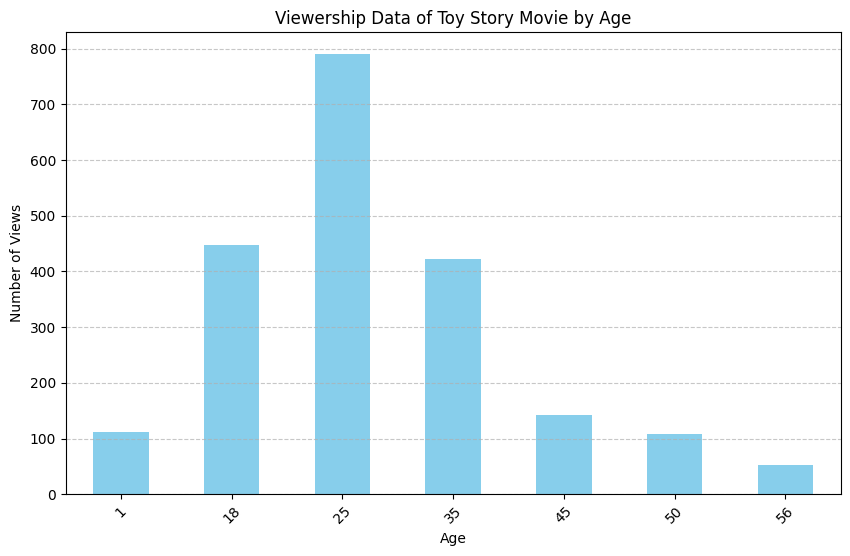

In [44]:
viewership = pd.merge(ratings_data, users_data, how='left', left_on=['UserID'], right_on=['UserID'])

viewership.shape

ratings_data.shape

viewership.head()

viewership_of_toystory = viewership[viewership['MovieID'] == 1]

# Group viewership data by age and count the number of views
age_group = viewership_of_toystory.groupby('Age').size()

# Plotting the bar plot
plt.figure(figsize=(10, 6))
age_group.plot(kind='bar', color='skyblue')
plt.xlabel('Age')
plt.ylabel('Number of Views')
plt.title('Viewership Data of Toy Story Movie by Age')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [47]:
movie_rating = ratings_data.groupby(['MovieID'], as_index=False)
average_movie_ratings = movie_rating.agg({'Rating':'mean'})
top_25_movies = average_movie_ratings.sort_values('Rating', ascending=False).head(25)
top_25_movies

,MovieID,Rating
926,989,5.000000
3635,3881,5.000000
1652,1830,5.000000
3152,3382,5.000000
744,787,5.000000
3054,3280,5.000000
3367,3607,5.000000
3010,3233,5.000000
2955,3172,5.000000
3414,3656,5.000000


In [51]:
# Extracting MovieID and Rating from the top 25 movies DataFrame
movie_ids = top_25_movies['MovieID']
average_ratings = top_25_movies['Rating']

In [52]:
pd.merge(top_25_movies, movie_data, how='left', left_on=['MovieID'], right_on=['MovieID'])

,MovieID,Rating,Title,Genres
0,989,5.000000,Schlafes Bruder (Brother of Sleep) (1995),Drama
1,3881,5.000000,Bittersweet Motel (2000),Documentary
2,1830,5.000000,Follow the Bitch (1998),Comedy
3,3382,5.000000,Song of Freedom (1936),Drama
4,787,5.000000,"Gate of Heavenly Peace, The (1995)",Documentary
5,3280,5.000000,"Baby, The (1973)",Horror
6,3607,5.000000,One Little Indian (1973),Comedy|Drama|Western
7,3233,5.000000,Smashing Time (1967),Comedy
8,3172,5.000000,Ulysses (Ulisse) (1954),Adventure
9,3656,5.000000,Lured (1947),Crime


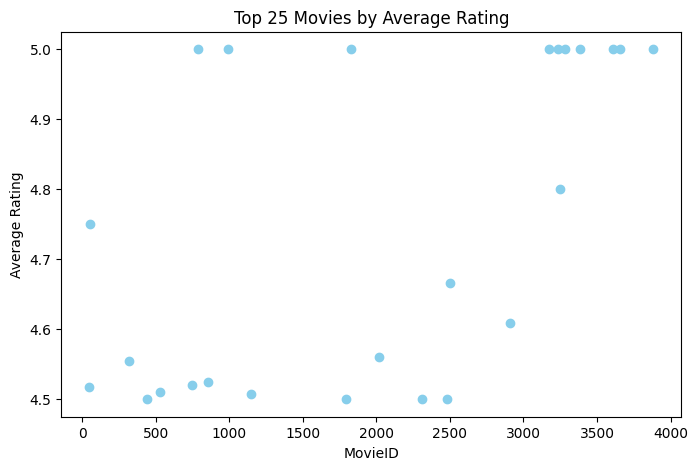

In [53]:

# Scatter Plot
plt.figure(figsize=(8, 5))
plt.scatter(movie_ids, average_ratings, color='skyblue')
plt.xlabel('MovieID')
plt.ylabel('Average Rating')
plt.title('Top 25 Movies by Average Rating')
plt.show()


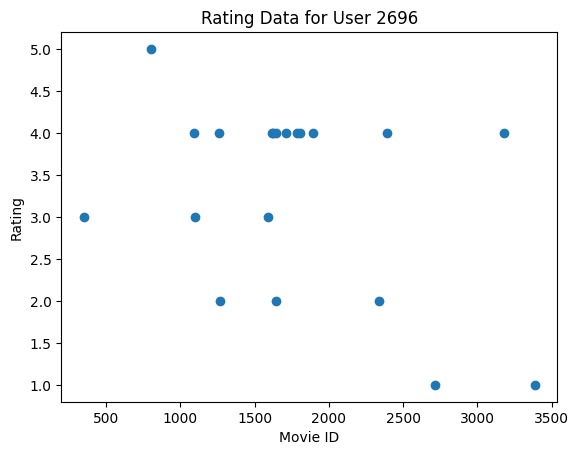

In [66]:
user_rating_data = ratings_data[ratings_data['UserID']==2696]
user_rating_data.head()

plt.scatter(x=user_rating_data['MovieID'], y=user_rating_data['Rating'])
plt.xlabel('Movie ID')
plt.ylabel('Rating')
plt.title('Rating Data for User 2696')
plt.show()


In [61]:
few_viewership = viewership.head(500)
few_viewership.shape

few_viewership.head()

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(few_viewership['Age'])
x_age = le.transform(few_viewership['Age'])
x_age

le.fit(few_viewership['Occupation'])
x_occ = le.transform(few_viewership['Occupation'])
x_occ

le.fit(few_viewership['MovieID'])
x_movieid = le.transform(few_viewership['MovieID'])
x_movieid

array([130,  78,  95, 374, 280, 132, 156, 321,  71,  96,  72,  98, 287,
       330, 107, 318, 304, 251, 355, 319, 274,  80, 154,  61, 278,  12,
       119, 211, 186,  84, 271, 364, 189,  67, 231,  86, 226, 103, 316,
        18,   0, 243, 244, 305,  29, 104, 105, 135, 252,  62, 359,  74,
       145, 161, 346, 184,  75, 264,  76, 266, 302, 121, 329, 379, 136,
       222, 205, 137, 392, 326, 342, 139, 355,  49, 260, 356, 357, 343,
       148, 194,  33, 265, 347,  92,  44, 149, 360, 185, 158, 127, 366,
       367, 368,  17, 267, 293, 225, 380,  68, 207, 398, 323, 237, 100,
       227, 324, 140, 252,  60,  50, 272,  30, 170, 113, 403,  54, 173,
       255, 151, 162, 130, 224, 163, 279, 372, 289,  69, 131, 187,  83,
       133,  70, 281,  15, 308, 297, 234, 286, 407, 239, 193, 413, 240,
       241,  28, 122, 242,  20,   3,  21, 274, 115,  46, 294,  39,  51,
       118,  97,  52, 181, 376, 166, 378, 353,  85,  56, 312, 247, 244,
       220, 331, 248,  36, 135, 246, 400, 143,  41, 144, 145, 41

In [ ]:
few_viewership['New Age'] = x_age
few_viewership['New Occupation'] = x_occ
few_viewership['New MovieID'] = x_movieid

In [63]:
x_input = few_viewership[['New Age','New Occupation','New MovieID']]
y_target = few_viewership['Rating']

x_input.head()

x_train, x_test, y_train, y_test = train_test_split(x_input, y_target, test_size=0.25)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

from sklearn.linear_model import LogisticRegression
logitReg = LogisticRegression()
lm = logitReg.fit(x_train, y_train)

result = logitReg.predict(x_test)

result

array([5, 4, 4, 5, 4, 4, 4, 4, 5, 4, 4, 5, 4, 4, 4, 5, 5, 4, 4, 4, 4, 5,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 4, 4, 4, 4, 5, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 5, 4, 4, 4,
       4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4])

In [64]:
estimated = pd.Series(result, name='Estimated Values')

final_result = pd.concat([y_test, estimated], axis=1)

print (accuracy_score(y_test, result))

print (confusion_matrix(y_test, result))

print (classification_report(y_test, result, zero_division=0))

0.32
[[ 0  0  0  6  0]
 [ 0  0  0 12  0]
 [ 0  0  0 37  5]
 [ 0  0  0 33  7]
 [ 0  0  0 18  7]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00        12
           3       0.00      0.00      0.00        42
           4       0.31      0.82      0.45        40
           5       0.37      0.28      0.32        25

    accuracy                           0.32       125
   macro avg       0.14      0.22      0.15       125
weighted avg       0.17      0.32      0.21       125

